# Supernova Remnants Notebook

### Task 1
In this task you will plot the analytical solution for the Sedov-Taylor phase of the evolution of a supernova remnant. 

First load the modules you will need (numpy and matplotlib).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

To calculate these quantities correctly we need to make sure all values are using the same system of units. Here we are using cgs (centimetres, grams, seconds).
To input and output the values it makes more sense to have them in units more suited to astronomy, to make them easier to read.

Define some constants that can be multiplied by the output values so we can print them out in useful units.

For example, time will be calculated in seconds but it is more useful for us to output it in years, or Megayears. 
So we can define:

$sectoyear = 60 \times 60 \times 24 \times 365.25$

Then multiply this by the output to ensure the time we are reading is printed in years. 

Lengths will be calculated in $cm$ - but we want them in $pc$.

Velocities will be calculated in $cm/s$ - but we want them in $km/s$.

Masses will be calculated in grams - but we want them in solar masses. 

In [3]:
#Convert seconds to years
sectoyear = 60 * 60 * 24 *365.25
#Convert centimetres to parsec
cmtopc = 3.086E18
#Convert centimetres to velocity
cmtokm = 1.0E5
#Convert solar masses to grams
sol2gram = 1.989E33

Now we need to define some constant values such as the explosion energy and ambient density of the surrounding *ISM (interstellar medium)*. 

Ambient density = 1.E-26   (units = $g /{cm}^3$)

Explosion energy = 1.E51 (units = $erg$)

(These are both in cgs units so they don't need to be converted)

We should also define the mass of the ejected stellar material. For a type II supnernova this would be above 8M$_{\odot}$, for a type Ia supernova it would be much lower as the white dwarf has already blown all of the external stellar material away. We could estimate it to be below 1M$_{\odot} in this case. 
Remember the mass will need to be converted into cgs!

In [4]:
#Ambient density (ISM) in cgs                                                                                                                                                                                                  
rho_ambient = 1.E-26
#Explosion energy in cgs
E_SN = 1.E51
# Ejected mass                                                                                                                                                                                 
M_ejecta = 0.25 * sol2gram

We are going to be calculating the radius and velocity of the expanding shell during the Sedov-Taylor (ST) phase of the evolution of the SNR. 
To get the initial values for the velocity and radius of the swept up shell for the ST phase, we can estimate the velocity at the end of the free expansion phase.

Work out the initial velocity of the ejected stellar material using the equation below, assuming the explosion energy is converted to kinetic energy. 

### $E_{SN}$ = $\frac{1}{2} M_{e}v_{e}^2$


In [5]:
v_ejecta = (2. * E_SN /	M_ejecta)**(1./2.)
print "Initial velocity of the ejected material", v_ejecta/cmtokm, "km/s"

Initial velocity of the ejected material 20055.2279199 km/s


### Task 2

Next we can work out the shell radius (in parsec) at the end of the free expansion phase, then the time it has taken (in years) to reach that radius. Use the equations below and assume the velocity in the free expansion phase is constant.

$\rho_{0}$ is the ambient density of the surrounding interstellar medium.

### $R_{SW} = \left(\frac{3M_{e}}{4\pi\rho_{0}}\right)^{1/3}$

### $t_{SW} = \frac{R_{SW}}{v_{e}}$

In [6]:
R_SW = (3. * M_ejecta /(4. * np.pi * rho_ambient))**(1./3.)
t_SW = R_SW / v_ejecta
print "Radius at the end of the free expansion phase", R_SW/cmtopc, "pc"
print "Time at the end of the free expansion phase", t_SW/sectoyear, "years"

Radius at the end of the free expansion phase 7.39207116209 pc
Time at the end of the free expansion phase 360.437934105 years


### Task 3

Now work out the radius and velocity of the expanding shell of gas as a function of time during the Sedov-Taylor phase (where the time starts at the end of the free expansion phase). 

### $R_{Sed}(t) = \left(\frac{25E_{SN}}{4\pi\rho_{0}}\right)^{1/5}t^{2/5}$

### $V_{Sed}(t) = \frac{2}{5}\left(\frac{25E_{SN}}{4\pi\rho_{0}}\right)^{1/5}t^{-3/5}$

Remember to use cgs units for the values in your calculations, then convert back to more sensible values (i.e. parsec,  years and km/s) afterwards. 

In [7]:
t_start = 360
t_end = 20000 #years                                                                                                                                                                                                           
blah=(10000 - t_start+1)

#Define arrays
R_sed =[]
V_sed =[]
t_sed =[]
#R_sed = np.zeros(blah)
#V_sed = np.zeros(blah)
#Time = np.zeros(blah)

#Loop over time                                                                                                                                                                                                                
for i in range(t_start, t_end, 10):
    Time = i * sectoyear
    t_sed.append(Time/sectoyear)
    
    Radius = ((25.  * E_SN)/(4. * np.pi * rho_ambient))**(1./5.) * (Time)**(2./5.)
    R_sed.append(Radius/cmtopc)
    
    Velocity = (2.0/5.0)*((25.0 * E_SN)/(4. * np.pi  * rho_ambient))**(1./5.) * Time**(-3./5.)
    V_sed.append(Velocity/cmtokm)

print "Values after expansion in the Sedov-Taylor phase after 20 000 years:"
print "Radius = ", R_sed[-1], "pc"
print "Velocity = ", V_sed[-1], "km/s"



Values after expansion in the Sedov-Taylor phase after 20 000 years:
Radius =  49.0136236442 pc
Velocity =  959.082493093 km/s


Use the subplot function within matplotlib to create two plots showing the evolution of the shell radius with time and the shell velocity with time. 

Remember to add titles and axis labels. 

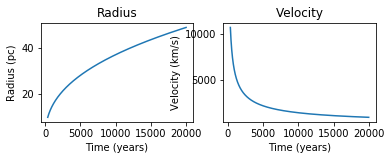

In [8]:
plt.subplot(2,2,1)
plt.plot(t_sed, R_sed)
plt.title('Radius')
plt.ylabel('Radius (pc)')
plt.xlabel('Time (years)')

plt.subplot(2,2,2)
plt.plot(t_sed, V_sed)
plt.title('Velocity')
plt.ylabel('Velocity (km/s)')
plt.xlabel('Time (years)')

plt.show()